In [1]:
import cv2
import glob
import tqdm
import numpy as np
# import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

2023-02-05 18:25:41.699945: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-05 18:25:42.339712: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/skhalid/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-05 18:25:42.339766: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/skhalid/.local/lib/python3.10/site-packages/cv2/.

Instructions for updating:
non-resource variables are not supported in the long term


In [15]:
PATH="/home/skhalid/Documents/torch-ngp/refinerf/refinerf_intrinsics_phd_checkpoint"
# PATH="/home/skhalid/Documents/torch-ngp/refinerf/refinerf_extrinsics_phd_checkpoint"
# PATH="/home/skhalid/Documents/torch-ngp/refinerf/refinerf_int_ext_from_scratch"

In [16]:
files = glob.glob(PATH+"/*/*tfevents*")

In [17]:
files

['/home/skhalid/Documents/torch-ngp/refinerf/refinerf_intrinsics_phd_checkpoint/Playground_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_1_extrinsics_0_noise_pct_0.0/events.out.tfevents.1673978091.skhalid-MS-7A94',
 '/home/skhalid/Documents/torch-ngp/refinerf/refinerf_intrinsics_phd_checkpoint/Umbrella_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_1_extrinsics_0_noise_pct_0.0/events.out.tfevents.1673949335.skhalid-MS-7A94',
 '/home/skhalid/Documents/torch-ngp/refinerf/refinerf_intrinsics_phd_checkpoint/Playground_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_1_extrinsics_0_noise_pct_0.25/events.out.tfevents.1673968465.skhalid-MS-7A94',
 '/home/skhalid/Documents/torch-ngp/refinerf/refinerf_intrinsics_phd_checkpoint/Jumping_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_1_extrinsics_0_noise_pct_0.25/events.out.tfevents.1674080113.skhal

In [18]:
data = {}
files.sort()
for file in files:
    print("processing file: {}".format(file))
    data[file] = {
        "step": [],
        "psnr/psnr_s": [],
        "psnr/psnr_d": [],
        "loss/img_s_loss": [],
        "loss/img_d_loss": [],
        "validation/loss": [],
        "validation/lr": [],
        "evaluate/PSNR": [],
        "evaluate/SSIM": [],
        "evaluate/LPIPS": [],
        "error/fx": [],
        "error/fy": [],
        "error/R": [],
        "error/t": [],
    }
    for i, event in enumerate(tf.train.summary_iterator(file)):
        data[file]["step"].append(i)
        for value in event.summary.value:
            data[file][value.tag].append(value.simple_value)
#     break;

processing file: /home/skhalid/Documents/torch-ngp/refinerf/refinerf_intrinsics_phd_checkpoint/Balloon1_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_1_extrinsics_0_noise_pct_0.0/events.out.tfevents.1674006849.skhalid-MS-7A94
processing file: /home/skhalid/Documents/torch-ngp/refinerf/refinerf_intrinsics_phd_checkpoint/Balloon1_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_1_extrinsics_0_noise_pct_0.25/events.out.tfevents.1673997120.skhalid-MS-7A94
processing file: /home/skhalid/Documents/torch-ngp/refinerf/refinerf_intrinsics_phd_checkpoint/Balloon1_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_1_extrinsics_0_noise_pct_0.5/events.out.tfevents.1673987335.skhalid-MS-7A94
processing file: /home/skhalid/Documents/torch-ngp/refinerf/refinerf_intrinsics_phd_checkpoint/Balloon2_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_1_extrinsics_0_

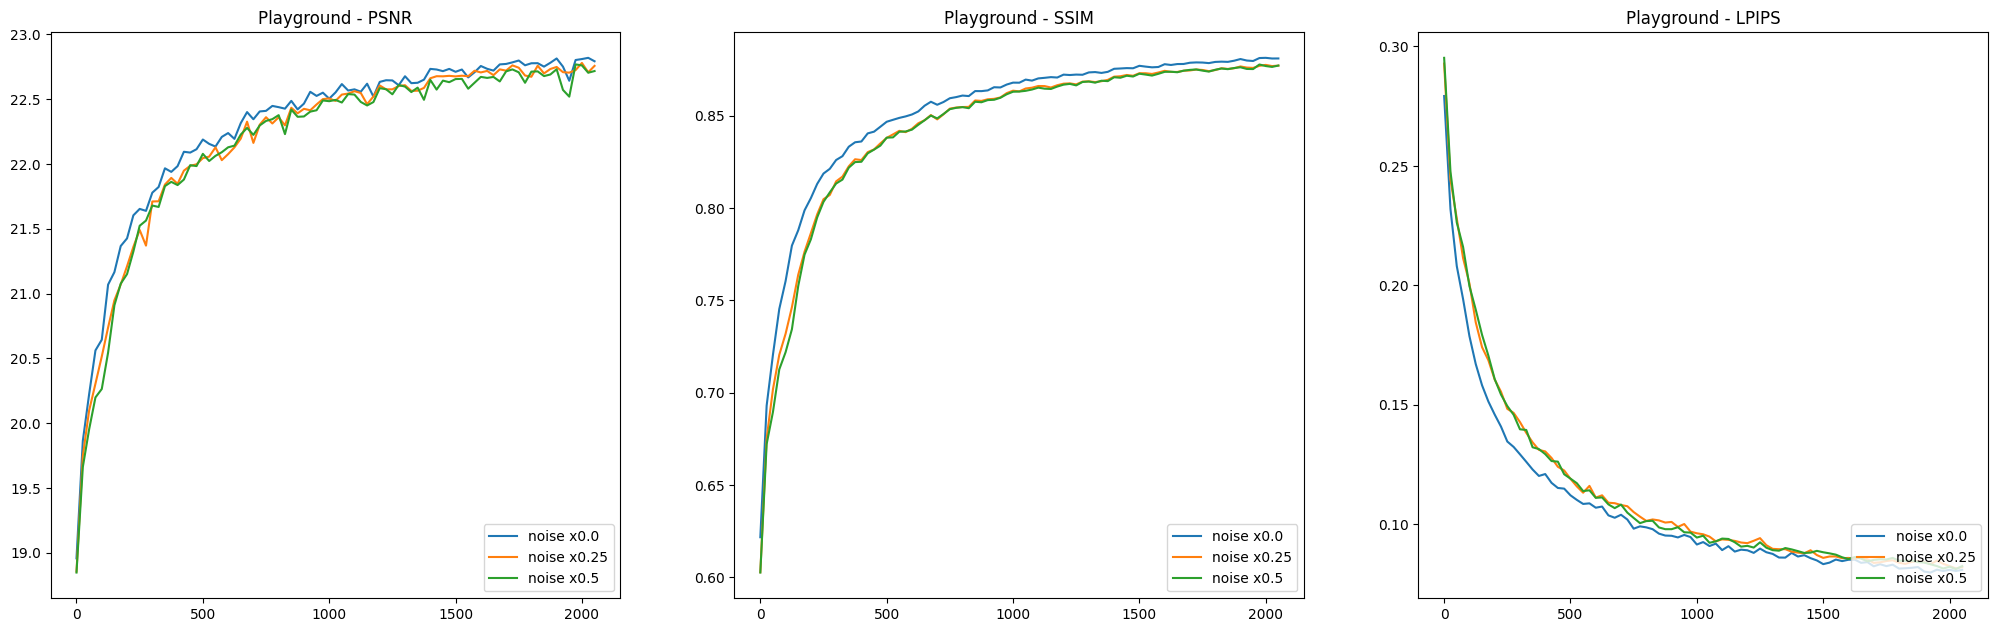

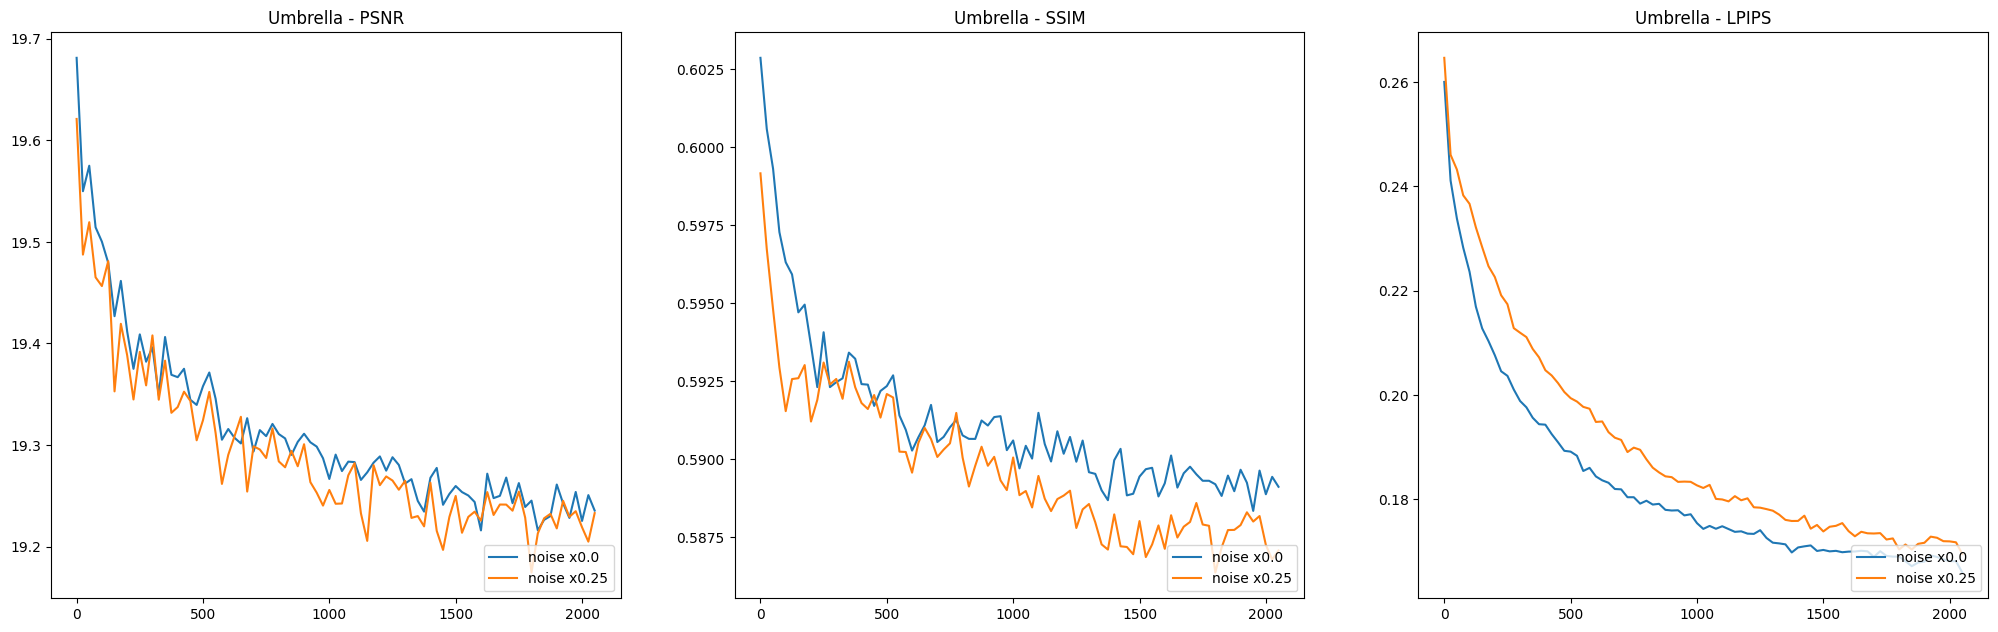

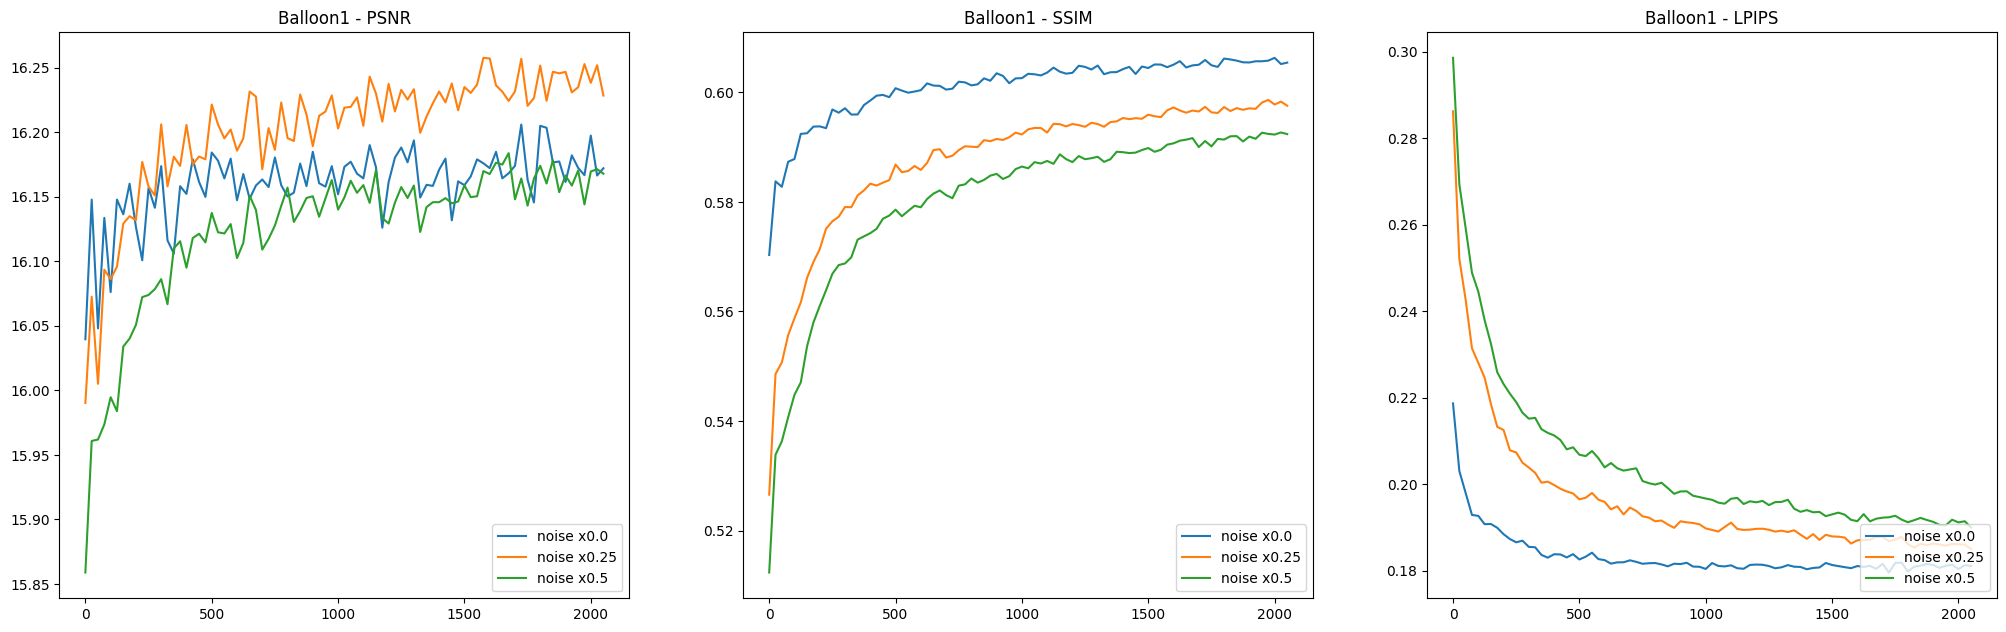

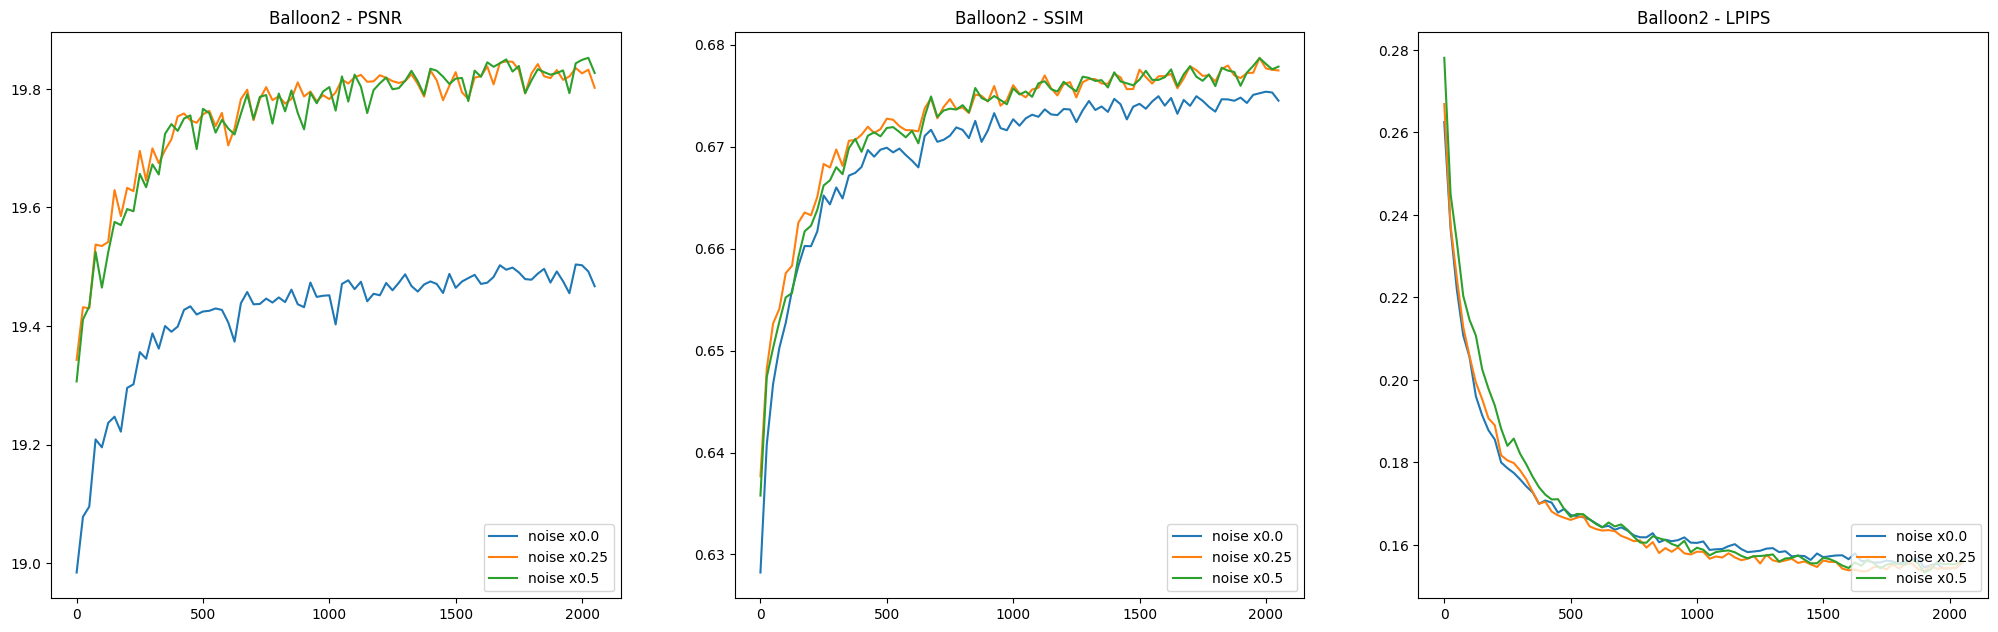

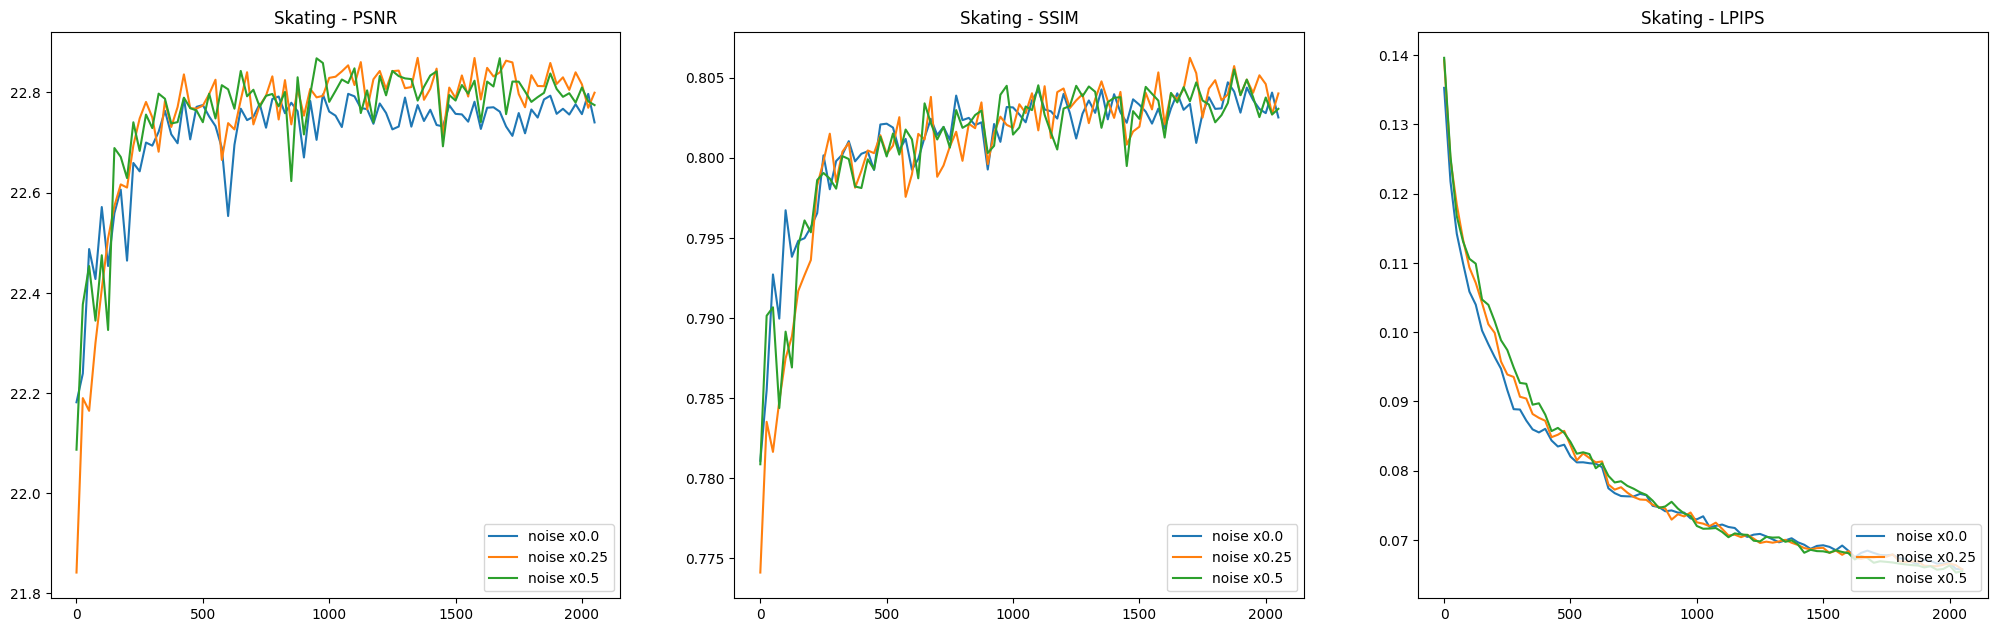

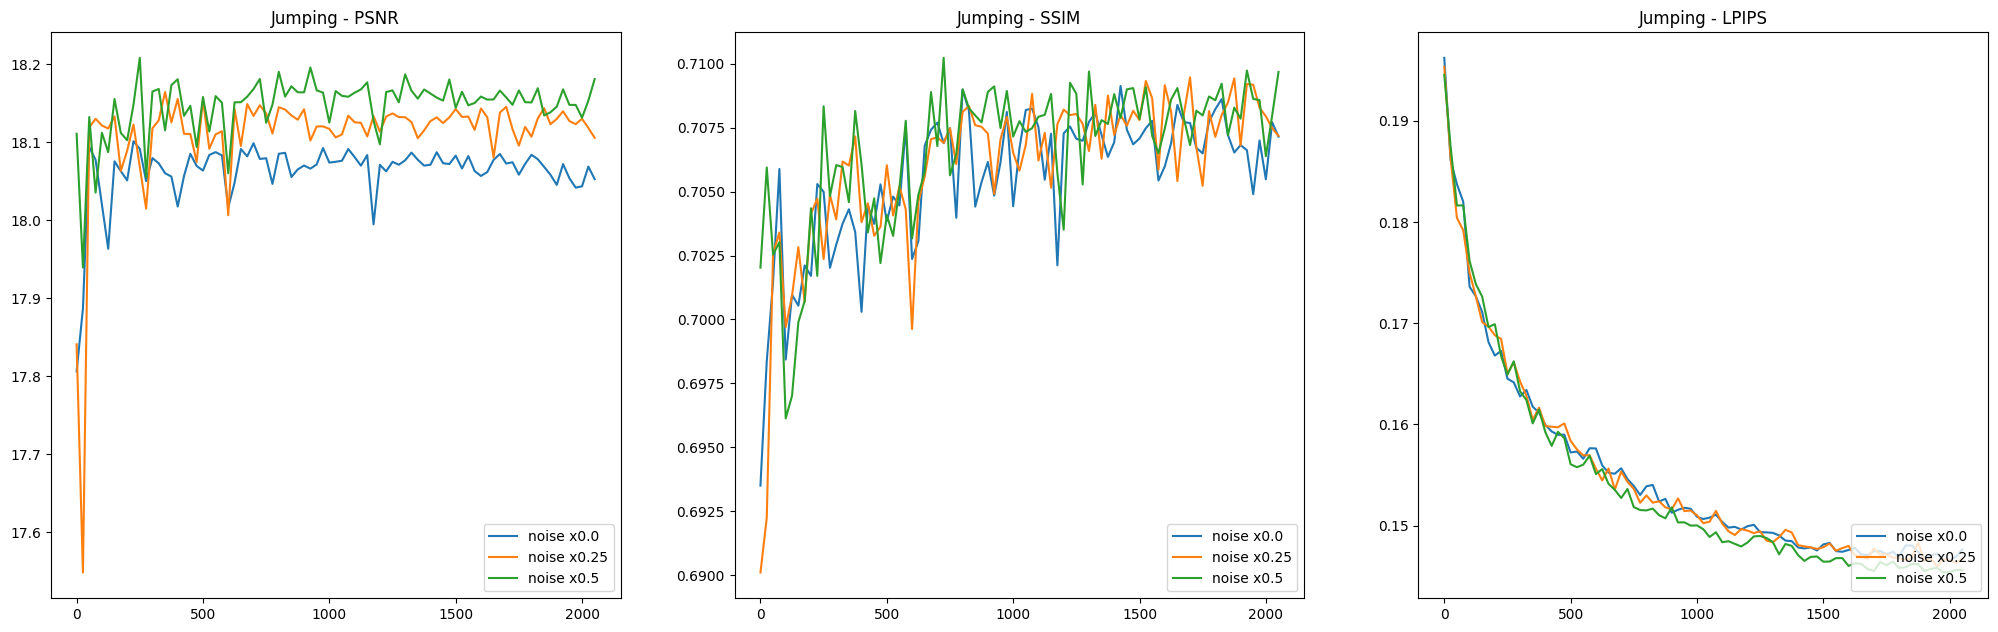

In [19]:
scenes = ["Playground", "Umbrella", "Balloon1", "Balloon2", "Skating", "Jumping"]
keys = ["evaluate/PSNR", 
        "evaluate/SSIM", 
        "evaluate/LPIPS", 
#         "error/fx",
#         "error/fy",
#         "error/R",
#         "error/t"
       ]

# Separate different files according to scene
for scene in scenes:
    print()
    cond = [v for v in files if scene in v]
    plt.figure(figsize=(25,25))
    for file in cond:
        for i,key in enumerate(keys):
            plt.subplot(int("33"+str(i+1)))
            label = file.split("_noise_")[1].split("/")[0].replace("pct_", "noise x")
            x_axis = [v*25 for v in range(len(data[file][key]))]
            y_axis = data[file][key]
            plt.title(scene + " - " + key.split("/")[-1])
            plt.plot(x_axis, y_axis, "-", label=label)
            plt.legend(loc="lower right")
            
            # stats
#             if ("barf_0_nerfmm_0" in file):
#                 msg = "fl: "+ str(label) + " " + key + " " + scene + " " + str(y_axis[-10]) # It takes slightly longer for the model to train - account for this and choose an earlier value
#                 print(msg)
#             if ("barf_0_nerfmm_1" in file):
#                 msg = "fl: "+ str(label) + " " + key + " " + scene + " " + str(y_axis[-1])
#                 print(msg)
#             if ("barf_1_nerfmm_0" in file):
#                 msg = "fl: "+ str(label) + " " + key + " " + scene + " " + str(y_axis[-1])
#                 print(msg)
            if ("barf_1_nerfmm_1" in file):
                msg = "fl: "+ str(label) + " " + key + " " + scene + " " + str(y_axis[-1])
                print(msg)


In [20]:
# y_axis[-10]